In [5]:
import pandas as pd
import numpy as np
import warnings
import os

from geopy.geocoders import Nominatim


In [6]:
warnings.filterwarnings('ignore')

In [7]:
# 1. **Magnitude**: Likely to be a strong predictor for the occurrence of a tsunami.
# 2. **Depth**: The depth of the earthquake can also be crucial; shallower earthquakes are more likely to trigger tsunamis.
# 3. **Latitude and Longitude**: These can be important if there are certain geographic regions that are more prone to tsunamis.
# 4. **Dmin**: Minimum distance to the station; could indicate how localized or widespread the seismic activity is.
# 5. **Gap**: Could help in indicating the reliability of the seismic reading.
# 6. **Sig**: An overall 'significance' score that takes into account various factors could be a good predictor.
# 7. **NST**: Number of stations that reported could be indicative of the event's magnitude.

# You might not want to include:

# 1. **CDI and MMI**: These are measures of the impact of the earthquake, which could be seen as outcomes rather than predictors.
# 2. **Year and Month**: Unless you have a reason to suspect seasonal or annual trends, these may not be helpful.

In [8]:
df = pd.read_csv('japan_tsunami.csv')

In [9]:
# from opencage.geocoder import OpenCageGeocode
# df = pd.read_csv('earthquake_1995-2023.csv')
# ## Initialize the geocoder
# key = '69dd9def50244697950b7aed4b0ddfc0'  # Your API key
# geocoder = OpenCageGeocode(key)

# def get_location_by_coordinates_opencage(lat, lon):
#     """Get location details from latitude and longitude."""
#     results = geocoder.reverse_geocode(lat, lon)

#     print("API Results:", results)

#     country = ''
#     continent = ''
#     body_of_water = ''

#     if len(results) > 0:
#         components = results[0]['components']
#         country = components.get('country', '')
#         continent = components.get('continent', '')
#         body_of_water = components.get('body_of_water', '')

#         print(f'lat: {lat}, lon: {lon}')
#         print(f'country: {country}')
#         print(f'continent: {continent}')
#         print(f'body_of_water: {body_of_water}')
#         print("\n")

#     return country, continent if continent else body_of_water

# # Update the missing values
# print ('reached here')
# for i, row in df.iterrows():
#     if pd.isna(row['country']) or pd.isna(row['continent']):
#         print(f"Row {i} - Update Needed: Country: {row['country']}, Continent: {row['continent']}")
#         lat, lon = row['latitude'], row['longitude']
#         country, geographic_info = get_location_by_coordinates_opencage(lat, lon)
#         df.at[i, 'country'] = country
#         df.at[i, 'continent'] = geographic_info  # Changed to 'continent' to make it consistent

#         #print updated row
#         print(f"Updated Row {i}:")
#         print(df.loc[i])
#         print("="*40)
# # Save the updated DataFrame
# df.to_csv('earthquake_1995-2023_fixed.csv', index=False)

In [10]:
df.head()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country
0,7.9,21-04-1997 21:02,5,6,yellow,1,1253,us,0,0,0,Mww,33,-12.3504,166.4056,Asia,Japan
1,6.3,30-09-1997 15:27,5,5,yellow,1,596,jp,0,0,0,Mww,52,31.5920,142.2678,Asia,Japan
2,7.6,05-12-1997 20:26,5,5,yellow,1,1129,us,0,0,0,Mww,33,54.5046,162.0210,Asia,Japan
3,7.7,04-05-1998 08:30,8,8,orange,1,1170,jp,0,0,0,Mww,35,22.2277,125.2621,Asia,Japan
4,7.1,17-07-1998 17:49,1,2,green,0,924,us,0,0,0,Mww,10,-2.5766,141.5556,Asia,Japan


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  189 non-null    float64
 1   date_time  189 non-null    object 
 2   cdi        189 non-null    int64  
 3   mmi        189 non-null    int64  
 4   alert      189 non-null    object 
 5   tsunami    189 non-null    int64  
 6   sig        189 non-null    int64  
 7   net        189 non-null    object 
 8   nst        189 non-null    int64  
 9   dmin       189 non-null    int64  
 10  gap        189 non-null    int64  
 11  magType    189 non-null    object 
 12  depth      189 non-null    int64  
 13  latitude   189 non-null    float64
 14  longitude  189 non-null    float64
 15  continent  189 non-null    object 
 16  country    189 non-null    object 
dtypes: float64(3), int64(8), object(6)
memory usage: 25.2+ KB


In [12]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.0,189.0,189.000000,189.000000,189.000000
mean,6.798413,2.947090,2.952381,0.322751,800.391534,0.0,0.0,0.0,1584.804233,26.074430,124.530029
std,0.612587,2.237817,2.239124,0.468770,251.413779,0.0,0.0,0.0,2070.549076,18.219472,59.892175
min,5.400000,1.000000,1.000000,0.000000,226.000000,0.0,0.0,0.0,0.000000,-36.073200,-174.395400
25%,6.400000,1.000000,1.000000,0.000000,637.000000,0.0,0.0,0.0,31.000000,23.222300,126.184300
50%,6.700000,2.000000,2.000000,0.000000,760.000000,0.0,0.0,0.0,642.000000,32.084700,140.543900
75%,7.200000,5.000000,5.000000,1.000000,965.000000,0.0,0.0,0.0,2887.000000,37.499300,143.130600
max,9.000000,10.000000,10.000000,1.000000,1704.000000,0.0,0.0,0.0,11997.000000,55.059900,178.441100


In [13]:
df.isnull().sum()/df.shape[0]*100

magnitude    0.0
date_time    0.0
cdi          0.0
mmi          0.0
alert        0.0
tsunami      0.0
sig          0.0
net          0.0
nst          0.0
dmin         0.0
gap          0.0
magType      0.0
depth        0.0
latitude     0.0
longitude    0.0
continent    0.0
country      0.0
dtype: float64

# Dropping Unnecessary Data

In [14]:
## Drop unecessary columns and convert time into year and month.
df.drop(['alert'],axis=1,inplace=True)
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [15]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
0,7.9,5,6,1,1253,us,0,0,0,Mww,33,-12.3504,166.4056,Asia,Japan,1997,4
1,6.3,5,5,1,596,jp,0,0,0,Mww,52,31.5920,142.2678,Asia,Japan,1997,9
2,7.6,5,5,1,1129,us,0,0,0,Mww,33,54.5046,162.0210,Asia,Japan,1997,5
3,7.7,8,8,1,1170,jp,0,0,0,Mww,35,22.2277,125.2621,Asia,Japan,1998,4
4,7.1,1,2,0,924,us,0,0,0,Mww,10,-2.5766,141.5556,Asia,Japan,1998,7


In [16]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
continent    0
country      0
Year         0
Month        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  189 non-null    float64
 1   cdi        189 non-null    int64  
 2   mmi        189 non-null    int64  
 3   tsunami    189 non-null    int64  
 4   sig        189 non-null    int64  
 5   net        189 non-null    object 
 6   nst        189 non-null    int64  
 7   dmin       189 non-null    int64  
 8   gap        189 non-null    int64  
 9   magType    189 non-null    object 
 10  depth      189 non-null    int64  
 11  latitude   189 non-null    float64
 12  longitude  189 non-null    float64
 13  continent  189 non-null    object 
 14  country    189 non-null    object 
 15  Year       189 non-null    int64  
 16  Month      189 non-null    int64  
dtypes: float64(3), int64(10), object(4)
memory usage: 25.2+ KB


# EDA (need further analysis to new dataset, will be compelete by zihan on saturady

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

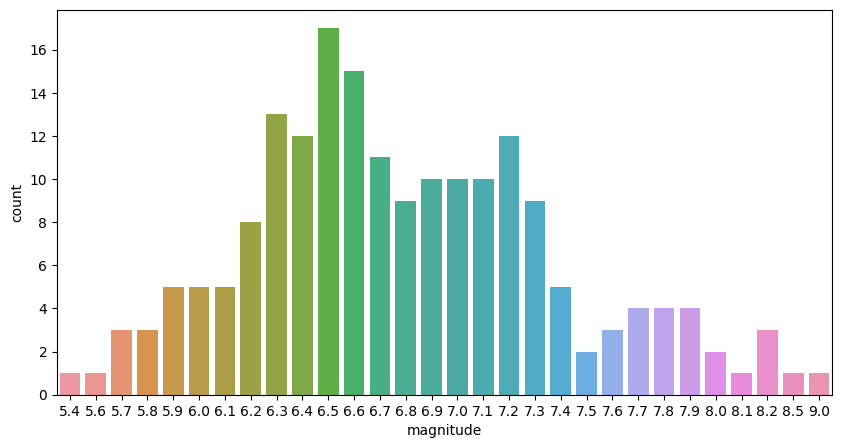

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale resulted from kaggle.

Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

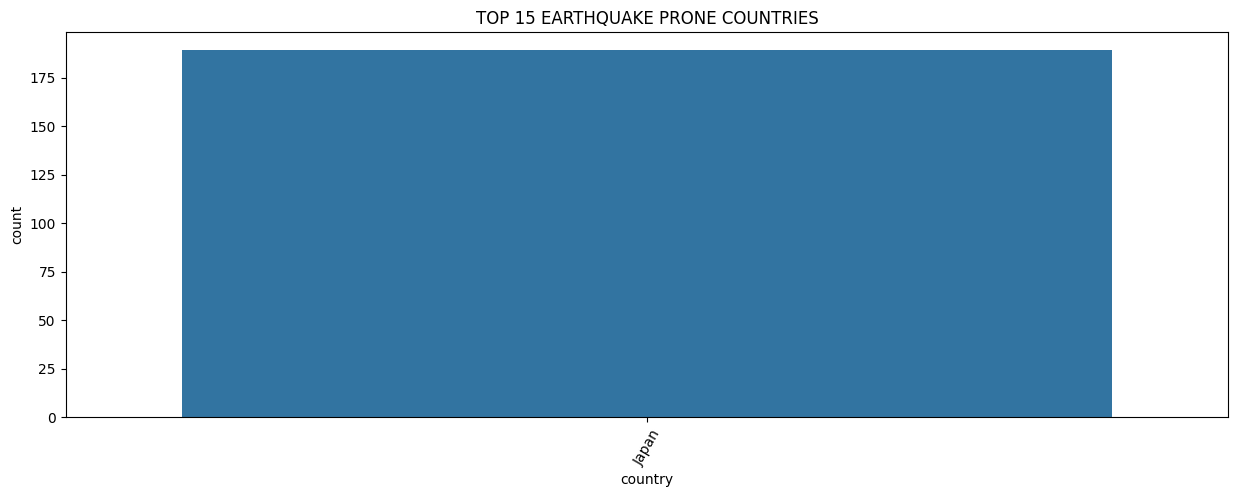

In [20]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

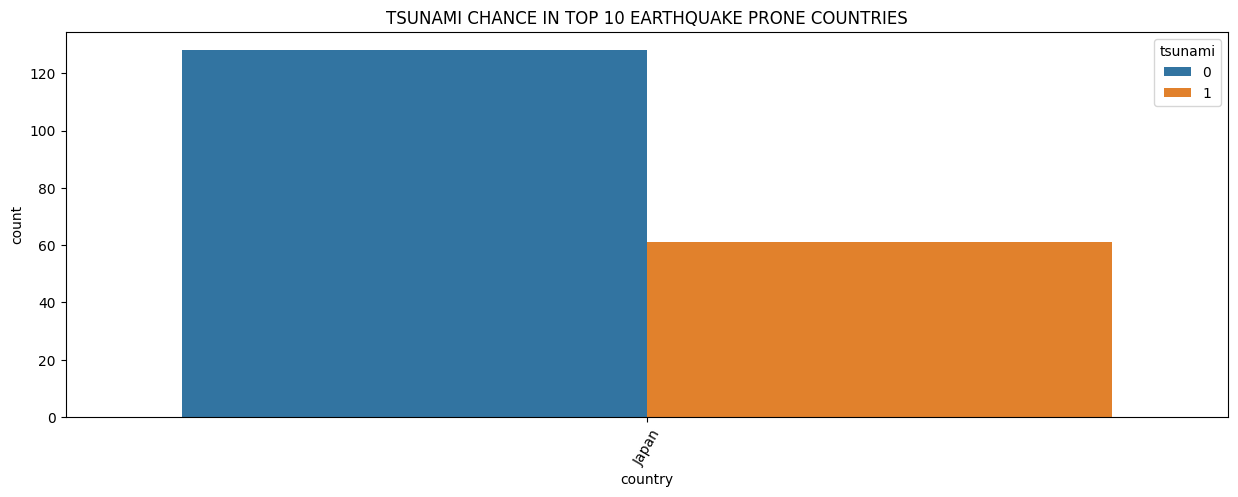

In [21]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

<Axes: xlabel='sig', ylabel='magnitude'>

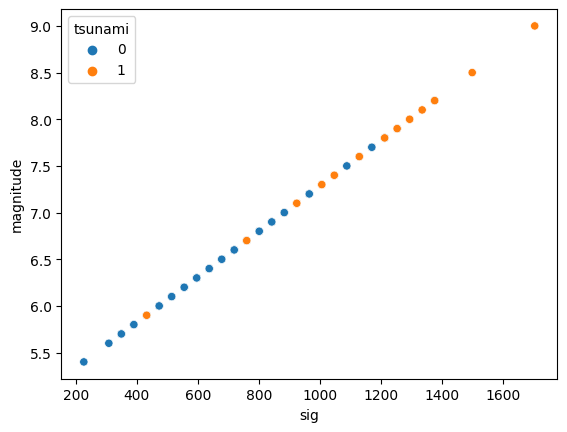

In [22]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

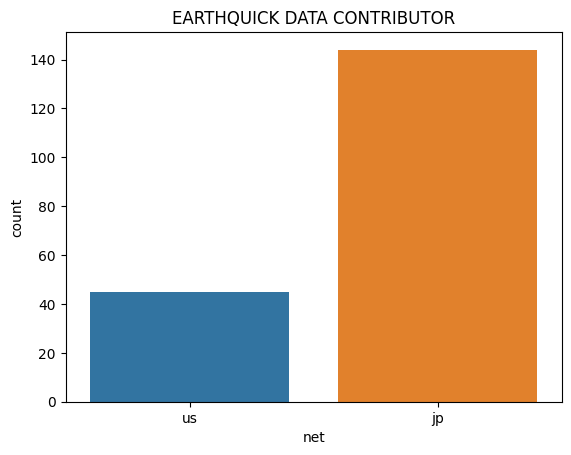

In [23]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'Tsunami Distribution')

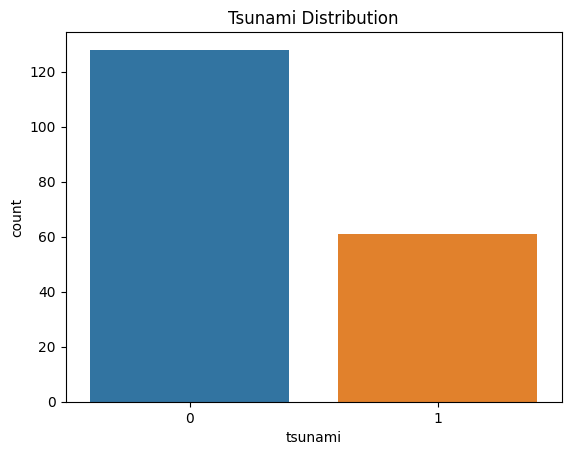

In [24]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

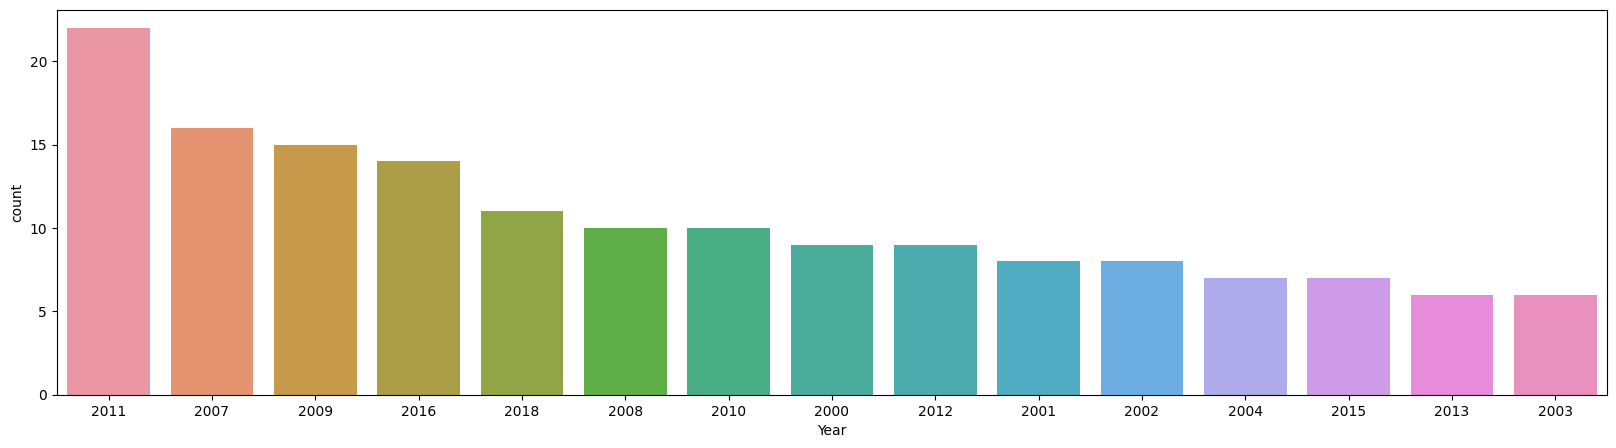

In [25]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN Japan PER YEAR')

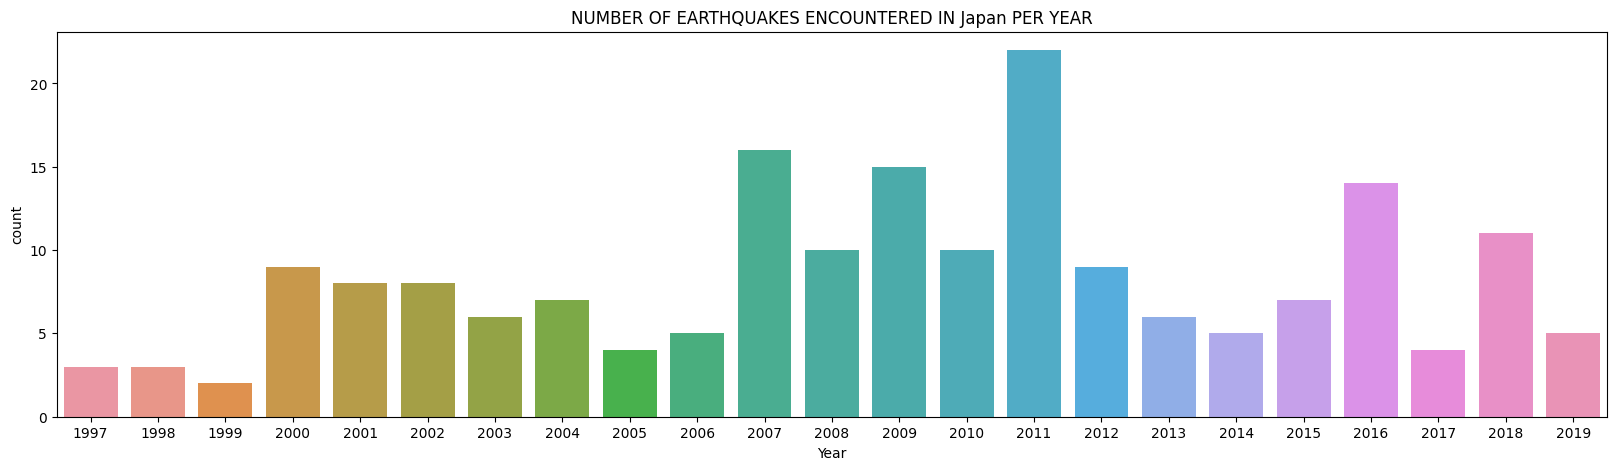

In [26]:
# Do this with japan as well
Japan=df[df['country']=='Japan']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Japan)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN Japan PER YEAR')
#Papua New Guinea experiences at least one earthquake per year

# Feature Engineering Continue

In [27]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
0,7.9,5,6,1,1253,us,0,0,0,Mww,33,-12.3504,166.4056,Asia,Japan,1997,4
1,6.3,5,5,1,596,jp,0,0,0,Mww,52,31.5920,142.2678,Asia,Japan,1997,9
2,7.6,5,5,1,1129,us,0,0,0,Mww,33,54.5046,162.0210,Asia,Japan,1997,5
3,7.7,8,8,1,1170,jp,0,0,0,Mww,35,22.2277,125.2621,Asia,Japan,1998,4
4,7.1,1,2,0,924,us,0,0,0,Mww,10,-2.5766,141.5556,Asia,Japan,1998,7


In [28]:
## we will drop the year and month, since the tsunami is not a seasonale staff. It can occurs anytime.
df.drop(['Year', 'Month'], axis=1,inplace=True)#we have latitude and longitude

In [29]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType,continent,country
0,us,Mww,Asia,Japan
1,jp,Mww,Asia,Japan
2,us,Mww,Asia,Japan
3,jp,Mww,Asia,Japan
4,us,Mww,Asia,Japan
...,...,...,...,...
184,jp,Mww,Asia,Japan
185,jp,Mww,Asia,Japan
186,jp,Mww,Asia,Japan
187,jp,Mww,Asia,Japan


In [30]:
obj.nunique()

net          2
magType      1
continent    1
country      1
dtype: int64

In [31]:
## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj.drop('net',axis=1,inplace=True)
df.drop(['net','country', 'continent','magType'],axis=1,inplace=True)

In [32]:
## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
0,7.9,5,6,1,1253,0,0,0,33,-12.3504,166.4056,0,0,0
1,6.3,5,5,1,596,0,0,0,52,31.5920,142.2678,0,0,0
2,7.6,5,5,1,1129,0,0,0,33,54.5046,162.0210,0,0,0
3,7.7,8,8,1,1170,0,0,0,35,22.2277,125.2621,0,0,0
4,7.1,1,2,0,924,0,0,0,10,-2.5766,141.5556,0,0,0


           magnitude       cdi       mmi   tsunami       sig  nst  dmin  gap  \
magnitude   1.000000  0.458185  0.489722  0.424120  1.000000  NaN   NaN  NaN   
cdi         0.458185  1.000000  0.949579  0.934140  0.458116  NaN   NaN  NaN   
mmi         0.489722  0.949579  1.000000  0.937027  0.489678  NaN   NaN  NaN   
tsunami     0.424120  0.934140  0.937027  1.000000  0.424029  NaN   NaN  NaN   
sig         1.000000  0.458116  0.489678  0.424029  1.000000  NaN   NaN  NaN   
nst              NaN       NaN       NaN       NaN       NaN  NaN   NaN  NaN   
dmin             NaN       NaN       NaN       NaN       NaN  NaN   NaN  NaN   
gap              NaN       NaN       NaN       NaN       NaN  NaN   NaN  NaN   
depth            NaN       NaN       NaN       NaN       NaN  NaN   NaN  NaN   
latitude   -0.413569       NaN       NaN       NaN -0.413639  NaN   NaN  NaN   
longitude  -0.328651       NaN       NaN       NaN -0.328751  NaN   NaN  NaN   
magType          NaN       NaN       NaN

<Axes: >

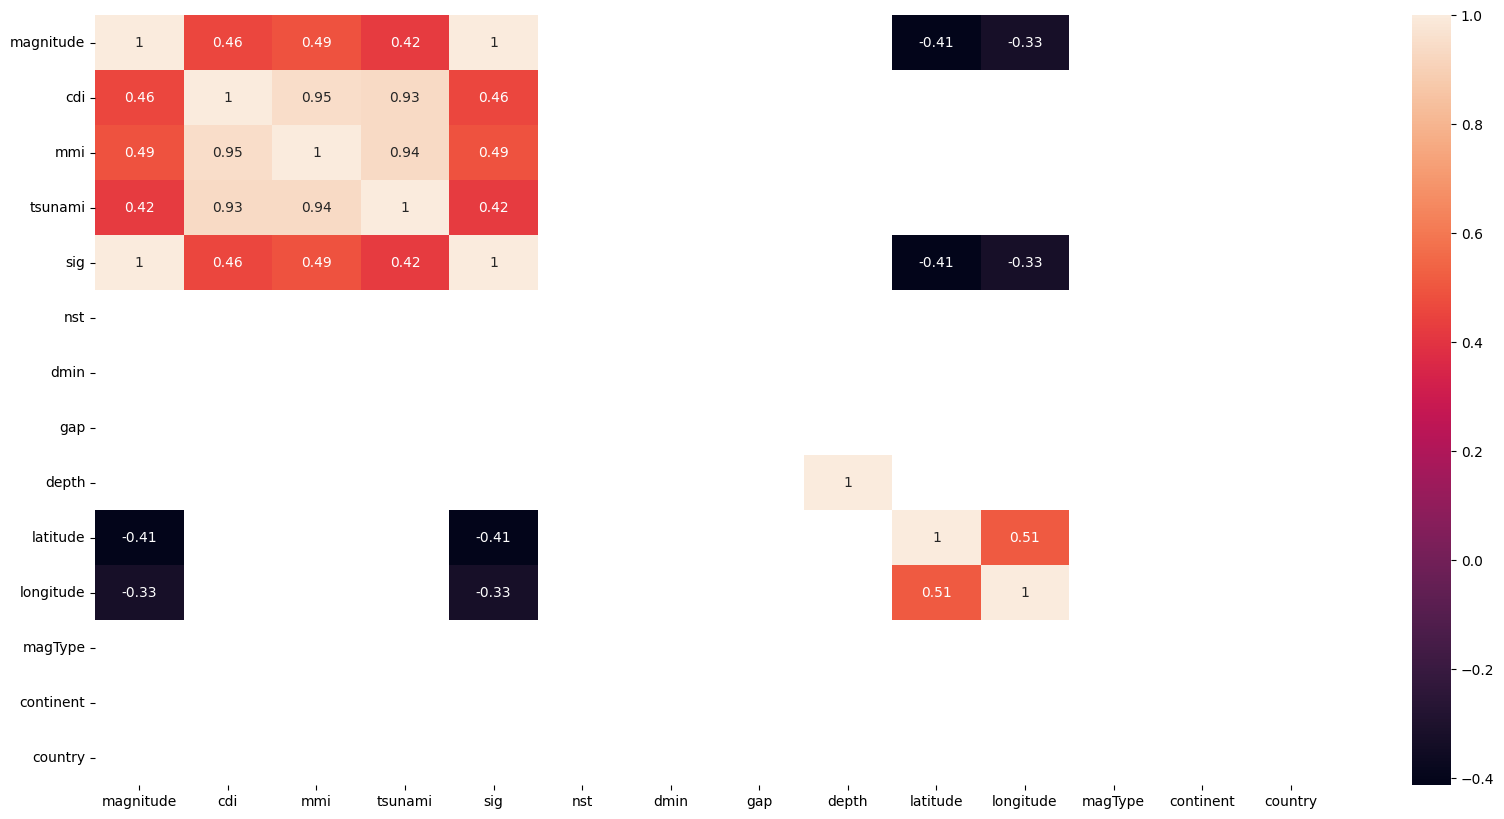

In [33]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
print(d)
sns.heatmap(d,annot=True)

# Scaling and model building

In [34]:
# Same model setting from the baseline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [35]:
# Prepocess dataset obtain tree and test dataset.
sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

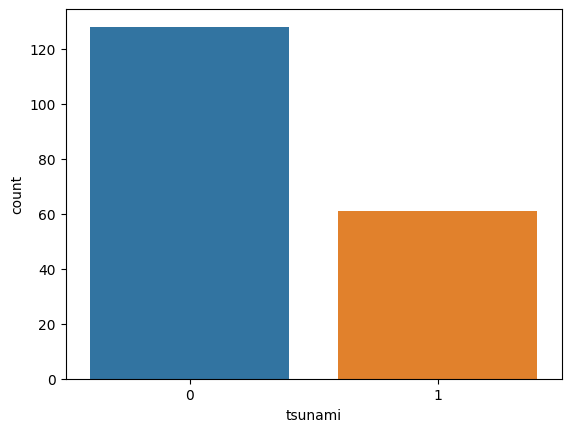

In [36]:
sns.countplot(x=y,data=df)

# Handling data imbalance

In [37]:
sm=SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [38]:
x_train_res.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
0,0.166274,1.367859,1.364691,0.165938,0.0,0.0,0.0,0.760362,0.618455,0.295122,0.0,0.0,0.0
1,0.820976,0.919808,1.364691,0.819981,0.0,0.0,0.0,-0.164549,0.351010,0.099237,0.0,0.0,0.0
2,0.166274,1.367859,1.364691,0.165938,0.0,0.0,0.0,1.452350,0.904407,0.346132,0.0,0.0,0.0
3,0.002598,-0.872396,-0.874255,0.002427,0.0,0.0,0.0,2.150149,0.166509,0.084245,0.0,0.0,0.0
4,0.657300,2.263961,1.812481,0.656470,0.0,0.0,0.0,-0.749519,-0.028794,0.064921,0.0,0.0,0.0


In [39]:
y_train_res.head()

0    1
1    1
2    1
3    0
4    1
Name: tsunami, dtype: int64

In [40]:
# Tree Models
models = {
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [41]:
for name,model in models.items():
    model.fit(x_train_res,y_train_res)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

.........................................................|
Model:  xg
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00    

# Grid Search: Hyperparameter

In [42]:
#XG

In [43]:
# Model: XG boosted tree
model_xg=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid_xg= GridSearchCV(model_xg, params, cv=5)
grid_xg.fit(x_train_res,y_train_res)
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Axes(0.125,0.11;0.62x0.77)


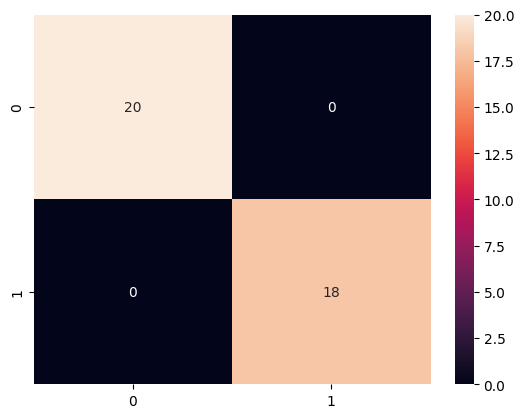

In [44]:
# Result of XG
p_xg = grid_xg.predict(x_test)
print(classification_report(y_test,p_xg))
print(sns.heatmap(confusion_matrix(y_test,p_xg),annot=True))

In [45]:
# Random forest

In [46]:
# Model Random forest
model_rf=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf= GridSearchCV(model_rf, params, cv=5)
grid_rf.fit(x_train_res,y_train_res)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Axes(0.125,0.11;0.62x0.77)


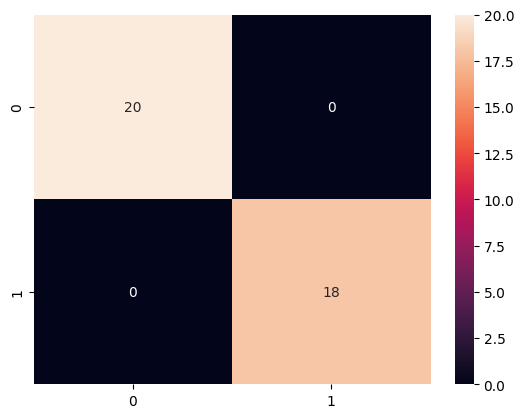

In [47]:
# Results of Random forest
p_rf = grid_rf.predict(x_test)
print(classification_report(y_test,p_rf))
print(sns.heatmap(confusion_matrix(y_test,p_rf),annot=True))

In [48]:
print(x_train_res)

     magnitude       cdi       mmi       sig  nst  dmin  gap     depth  \
0     0.166274  1.367859  1.364691  0.165938  0.0   0.0  0.0  0.760362   
1     0.820976  0.919808  1.364691  0.819981  0.0   0.0  0.0 -0.164549   
2     0.166274  1.367859  1.364691  0.165938  0.0   0.0  0.0  1.452350   
3     0.002598 -0.872396 -0.874255  0.002427  0.0   0.0  0.0  2.150149   
4     0.657300  2.263961  1.812481  0.656470  0.0   0.0  0.0 -0.749519   
..         ...       ...       ...       ...  ...   ...  ...       ...   
211   1.767303  1.864810  2.260270  1.768909  0.0   0.0  0.0 -0.752644   
212   0.258470  1.367859  1.364691  0.258042  0.0   0.0  0.0  0.987035   
213   1.432666  1.238133  1.046553  1.432210  0.0   0.0  0.0 -0.759063   
214   0.428796  1.277664  1.007045  0.428196  0.0   0.0  0.0 -0.633308   
215   1.607432  1.641145  1.637817  1.608857  0.0   0.0  0.0 -0.761201   

     latitude  longitude  magType  continent  country  
0    0.618455   0.295122      0.0        0.0      0.0  

In [49]:
print(x_test)

     magnitude       cdi       mmi       sig  nst  dmin  gap     depth  \
156  -1.634158 -0.424345 -0.874255 -1.636671  0.0   0.0  0.0  5.042069   
125  -0.488429  1.367859  0.916902 -0.488106  0.0   0.0  0.0  1.709485   
142   0.493625  1.367859  0.916902  0.492959  0.0   0.0  0.0 -0.740318   
90   -0.324753  0.919808  1.364691 -0.324595  0.0   0.0  0.0  1.264462   
31    1.639354 -0.424345 -0.426466  1.641524  0.0   0.0  0.0 -0.761141   
65   -1.470482 -0.424345 -0.426466 -1.469172  0.0   0.0  0.0 -0.754361   
38   -0.324753 -0.424345 -0.426466 -0.324595  0.0   0.0  0.0 -0.751940   
137   0.984651  0.919808  0.916902  0.983492  0.0   0.0  0.0 -0.755814   
149  -0.488429 -0.872396 -0.874255 -0.488106  0.0   0.0  0.0 -0.378102   
98    2.785083  3.160063  3.155849  2.786100  0.0   0.0  0.0 -0.756298   
181   0.166274 -0.872396 -0.426466  0.165938  0.0   0.0  0.0 -0.762593   
109   3.603461  3.160063  3.155849  3.603655  0.0   0.0  0.0  0.382165   
174  -0.161078 -0.872396 -0.874255 -0.

In [50]:
print(x_train)

     magnitude       cdi       mmi       sig  nst  dmin  gap     depth  \
77    0.166274  1.367859  1.364691  0.165938  0.0   0.0  0.0  0.760362   
159   0.820976  0.919808  1.364691  0.819981  0.0   0.0  0.0 -0.164549   
45    0.166274  1.367859  1.364691  0.165938  0.0   0.0  0.0  1.452350   
94    0.002598 -0.872396 -0.874255  0.002427  0.0   0.0  0.0  2.150149   
97    0.657300  2.263961  1.812481  0.656470  0.0   0.0  0.0 -0.749519   
..         ...       ...       ...       ...  ...   ...  ...       ...   
56    0.820976 -0.424345 -0.426466  0.819981  0.0   0.0  0.0 -0.756782   
81    1.148327  1.367859  0.916902  1.147003  0.0   0.0  0.0 -0.759204   
16    1.639354 -0.424345 -0.426466  1.641524  0.0   0.0  0.0 -0.752908   
20    2.294056 -0.872396 -0.874255  2.295568  0.0   0.0  0.0 -0.751456   
146   0.329949  1.367859  0.916902  0.329448  0.0   0.0  0.0 -0.751456   

     latitude  longitude  magType  continent  country  
77   0.618455   0.295122      0.0        0.0      0.0  

# Check Result with DNN

In [52]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from skkeras import KerasClassifier
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='scikeras.wrappers')

# Function to create the model, required for KerasClassifier
def create_model(optimizer='adam', learning_rate=0.001, activation='tanh', neurons=8, dropout_rate=0.1, init_mode='lecun_uniform', kernel_regularizer=regularizers.l2(0.001), num_layers=2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], kernel_initializer=init_mode, activation=activation, kernel_regularizer=kernel_regularizer))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Define the grid search parameters
optimizer = ['tanh']
rate = 0.2

best_score = 0
best_params = {}


model = KerasClassifier(
    model=lambda: create_model(dropout_rate=rate),
    epochs=150,
    batch_size=8,
    verbose=1,  # Passing EarlyStopping callback here
)
grid_dnn = GridSearchCV(estimator=model, param_grid=dict(optimizer=optimizer), n_jobs=-1, cv=10, verbose=2)
grid_result_dnn = grid_dnn.fit(x_train_res, y_train_res)  # Use x_train instead of x_train_cnn for DNN

if grid_result_dnn.best_score_ > best_score:
    best_score_dnn = grid_result_dnn.best_score_
    best_params_dnn = grid_result_dnn.best_params_
    best_params_dnn["dropout_rate"] = rate

# Summarize results
print("Best: %f using %s" % (best_score_dnn, best_params_dnn))


ModuleNotFoundError: ignored

In [ ]:
# Step 1: Get the Best Model
best_estimator_dnn = grid_result_dnn.best_estimator_

# Predict labels of test data
y_pred = best_estimator_dnn.predict(x_test)

# Step 3: Evaluate Performance
from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



# Try out nested cross vlidation technique to manupilate with the result

In [53]:
# Define the outer loop - 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = xgb.XGBClassifier ()

    # Define search space for hyperparameters
    params = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  1.0


In [54]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

# Outer loop for cross-validation
for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = RandomForestClassifier()

    # Define search space for hyperparameters
    params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_features': ['sqrt', 'log2']}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  1.0


# Analysis on the results

# Incoprate with JP dataset. Test on exsting models

## Analysis Result again

## Improve on the model